In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# Cargar datasets
train_reviews = pd.read_csv("../data/train_reviews.csv")
test_reviews = pd.read_csv("../data/test_reviews.csv")
usuarios = pd.read_csv("../data/usuarios.csv")
negocios = pd.read_csv("../data/negocios.csv")

C:\Users\aleja\AppData\Local\Temp\ipykernel_18876\2779904179.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  usuarios = pd.read_csv("../data/usuarios.csv")


In [3]:
train_reviews.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
241149,gtzHGtExQNCguH_UkHpZfg,VucKH9pEIs66ZtDNrtbhSQ,IhT8o6qC7ksBXMkxhYGmCw,5.0,0,0,0,Stopped in for a quick bite with the family. W...,2015-12-12 19:00:06
948425,RM3mnlE-2-JwiA7ZetDmOA,-81NcUjHhigZtIkDWKpQ4A,vt_esoDw6HG5ClM12OPkMg,5.0,0,2,0,"Hoo boy, was ol' soupcan not ready for this on...",2011-05-07 23:32:24
109146,FtkvL1fCTo71wTel-2Ckwg,vqvz7NZFudMM9Vzoq6hILQ,pIvX_Kw4f82baMUhRO6WxQ,4.0,16,11,7,"Yes people, it's loud I don't understand how ...",2019-10-04 18:22:25
301992,3KzCN_Z-1WWOfum_FQ-PVQ,_0hul7CFHVDbzHSaT_doGA,vWjME92WddneF98IqzaNfQ,4.0,0,0,0,Chain smoke house that has a cafeteria style s...,2019-03-10 15:39:47
922137,7GQCGWAREMDes3nCy-uWNQ,yCgpnLY0WC1QpY4YGd1I3A,1xvSSohE0kOmd85nNyyhuQ,1.0,2,0,0,"Firstly, the line was ridiculous. You wait in ...",2016-10-30 02:00:27


In [4]:
train_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [5]:
test_reviews.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date
113481,5IIKv0FtTolE_KoAuWo2xw,6KPzBZqURE6HMP70_nyGkQ,tjDRn-52X7f5jepGZQc4-Q,1,0,0,"Been coming here for years. Zero complaints, j...",2018-08-06 19:03:37
334974,IstBcpuZpNKilbxUnA1rmg,GgArDGzgRferMSxr73V_cw,1ZW_rnoS2UBydTyc_0ikSQ,0,0,0,We stopped in at Sekushi on a whim and were pl...,2020-02-15 22:47:01
1265,neFh5zT_wwZQ_qNQgl86Ag,L660roDb-WYeGSAnXUnvDg,NRQS7qjKcAsOqFTT_G1bSA,0,0,0,This is the best nail place in Boise! I've had...,2021-10-18 22:16:03
325394,zxVCfNx3CSV0roAB1bvXSw,cinvf5TfG2j3LqMVivF_0Q,FZUgTHSinYF057WMwCTDwA,1,0,0,We are in the process of selling our home and ...,2016-11-03 11:38:48
205160,rJ_4Q74qTyTaYOg4ROaR0w,f30Lid6iW6IF7gXz6srcIA,DOx8iZLCmP6tRpfyAadBRw,0,0,0,I really like the food here. It's sort of like...,2011-11-19 01:13:23


In [6]:
test_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Usuario

In [7]:
usuarios.sample(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
493481,w7Wzei0zZS1vb7Agtp_Fpg,Jennifer,4,2018-06-26 21:59:08,2,0,0,NaN,NaN,0,1.00,0,0,0,0,0,0,0,0,0,0,0
213808,ZCOH13kzcIjjdJf9aPAhyg,Monica,16,2013-03-24 04:51:59,5,4,1,NaN,NaN,1,4.75,0,0,0,0,0,0,0,0,0,0,0
57021,Ep0ljdr0wUX3bSMVUq2uAQ,Carol,23,2013-04-28 13:33:42,23,6,1,NaN,"Ar8rqEn6p-32N9_qFux-Zg, 4f9vkTHMpxeMhDOrTsAIXA...",0,2.52,0,0,0,0,0,0,0,0,0,0,0
618757,KPdNiHWnxsCEJCfD9jD7_Q,Robert,7,2011-03-12 02:43:20,6,3,1,NaN,"3A3teSiLsmBwWnb4C3_olQ, dSJUt5mczGTMSwG3O_P8TA...",2,4.57,0,0,0,0,0,0,0,0,0,0,1
506604,L4a1uYUzeVedNpfNx5dH4A,Jennifer,3,2015-02-21 19:08:42,0,0,0,NaN,NaN,0,4.00,0,0,0,0,0,0,0,0,0,0,0


In [8]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699619 entries, 0 to 699618
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             699619 non-null  object 
 1   name                699607 non-null  object 
 2   review_count        699619 non-null  int64  
 3   yelping_since       699619 non-null  object 
 4   useful              699619 non-null  int64  
 5   funny               699619 non-null  int64  
 6   cool                699619 non-null  int64  
 7   elite               55411 non-null   object 
 8   friends             427407 non-null  object 
 9   fans                699619 non-null  int64  
 10  average_stars       699619 non-null  float64
 11  compliment_hot      699619 non-null  int64  
 12  compliment_more     699619 non-null  int64  
 13  compliment_profile  699619 non-null  int64  
 14  compliment_cute     699619 non-null  int64  
 15  compliment_list     699619 non-nul

In [9]:
for col in usuarios.columns:
    print(usuarios[col].value_counts())

user_id
qVc8ODYU5SZjKXVBgXdI7w    1
iA1B6ah5sCh7jEwj6Ai95w    1
Y8MQz8P697xRyIGaEe4yKg    1
LQBe62Qq3cvLqsGJaEF5Rw    1
TC4aD5qZtE5oc72sSvwfOg    1
                         ..
SUokZE-eIboa2-GrO9rZVg    1
kjrFvGQnQwOWiA5u5XskHA    1
4LLGhrsgy65kcpIuiVEgmg    1
M2zqfnBr2EUI28y8aVRGng    1
wL5jPrLRVCK_Pmo4lM1zpA    1
Name: count, Length: 699619, dtype: int64
name
John       6435
Michael    5849
David      5611
Chris      5289
Mike       4795
           ... 
A Kate        1
Vil           1
Bethani       1
Efa           1
Gwendy        1
Name: count, Length: 61409, dtype: int64
review_count
1       68946
2       59690
3       51296
4       42746
5       35944
        ...  
1597        1
1375        1
1895        1
1017        1
2030        1
Name: count, Length: 1924, dtype: int64
yelping_since
2019-03-05 00:10:27    3
2015-07-08 23:52:22    2
2011-12-30 15:36:34    2
2014-07-03 19:01:30    2
2018-01-02 23:24:32    2
                      ..
2011-03-06 18:49:18    1
2009-06-05 04:34:16    1

In [10]:
usuarios.isnull().sum()

user_id                    0
name                      12
review_count               0
yelping_since              0
useful                     0
funny                      0
cool                       0
elite                 644208
friends               272212
fans                       0
average_stars              0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cute            0
compliment_list            0
compliment_note            0
compliment_plain           0
compliment_cool            0
compliment_funny           0
compliment_writer          0
compliment_photos          0
dtype: int64

In [11]:
new_usuarios = usuarios.drop(columns=["elite", "friends", "name"]) # ?
new_usuarios.columns

Index(['user_id', 'review_count', 'yelping_since', 'useful', 'funny', 'cool',
       'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos'],
      dtype='object')

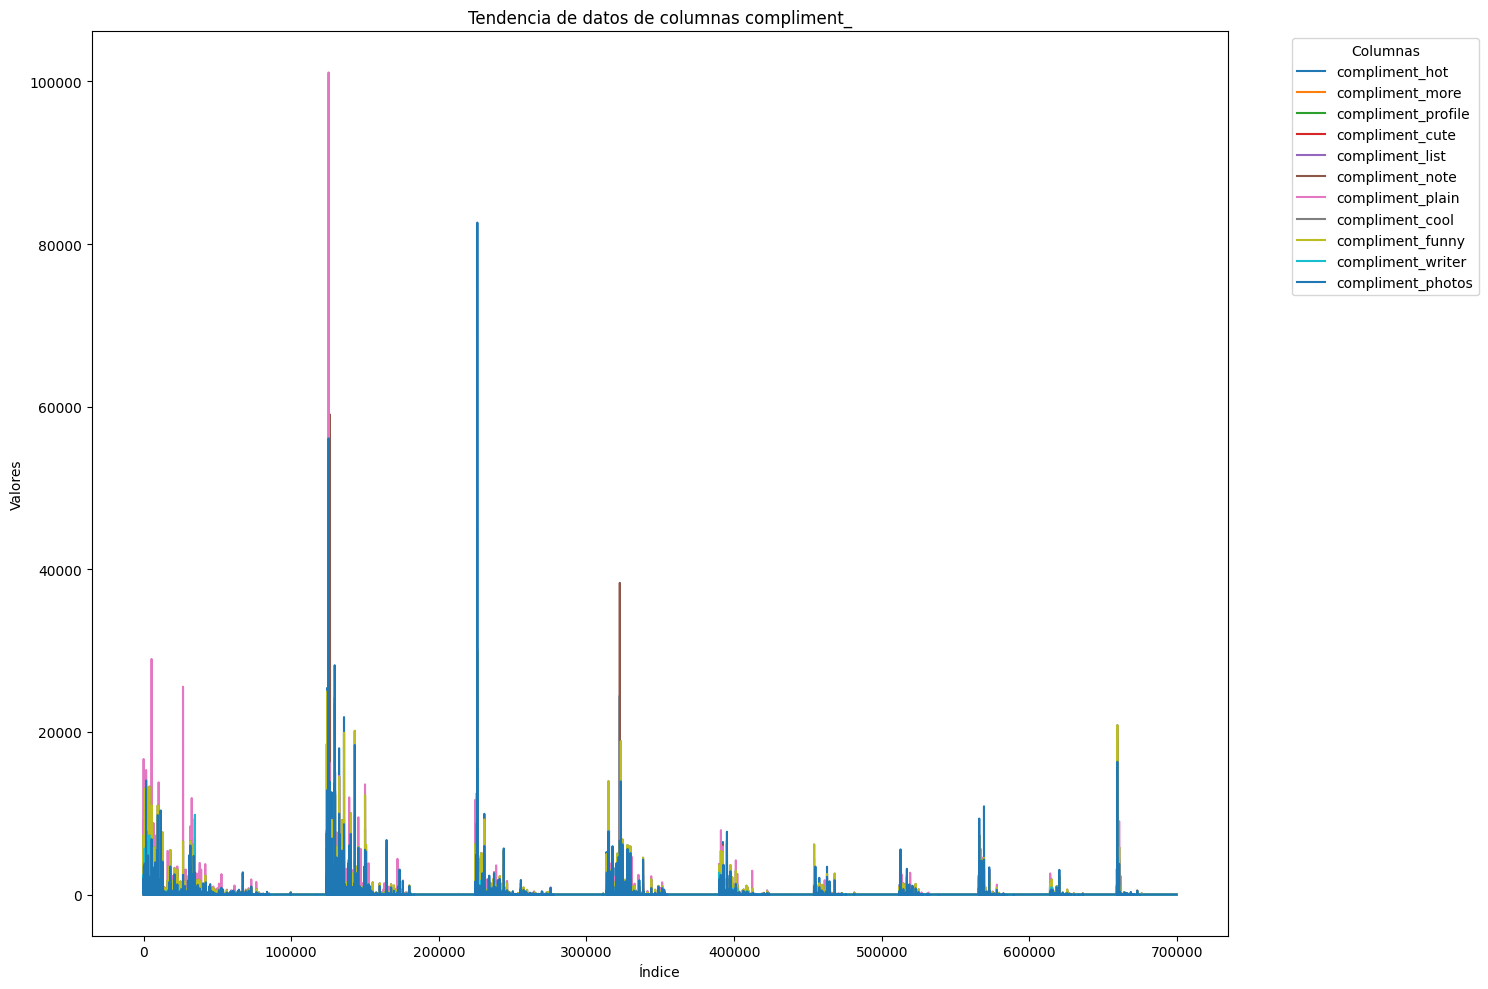

In [12]:
# Filtrar las columnas que comienzan con 'compliment_'
compliment_cols = [col for col in new_usuarios.columns if col.startswith("compliment_")]

# Crear un DataFrame con solo esas columnas
compliment_data = new_usuarios[compliment_cols]

# Crear un gráfico de distribución para cada columna
compliment_data.plot(kind='line', figsize=(15, 10), title='Tendencia de datos de columnas compliment_')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend(title='Columnas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
# Sumar todas las columnas que empiezan con 'compliment_'
new_usuarios['compliment'] = new_usuarios[compliment_cols].sum(axis=1)

# Eliminar las columnas originales si ya no son necesarias
new_usuarios = new_usuarios.drop(columns=compliment_cols)

# Verificar el resultado
new_usuarios.sample(5)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment
201823,X3rRwxaiiqHlM_jszQhnQg,8,2014-06-20 20:39:25,1,0,0,0,3.00,0
442909,mj8EA7b09LPNN33LnHEWjw,16,2016-07-12 14:31:18,1,0,0,0,4.88,1
247678,b60MC7eeHhxVSuuhx5pJzQ,7,2016-09-15 01:02:49,0,0,0,1,4.43,0
366305,yJ-ziNkUESfvjrD6WRX3FA,2,2020-06-08 18:20:40,4,0,0,0,3.50,0
405227,muxsEXQS9rYbZ_J0xv8NCg,2,2012-12-12 20:53:34,1,0,0,0,2.50,0


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_usuarios["compliment"] = scaler.fit_transform(new_usuarios["compliment"].values.reshape(-1, 1))

new_usuarios["compliment"].describe()

count    6.996190e+05
mean     6.093683e-18
std      1.000001e+00
min     -3.508534e-02
25%     -3.508534e-02
50%     -3.508534e-02
75%     -3.266433e-02
max      3.925654e+02
Name: compliment, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler

compliment_cols = ["review_count", "useful", "funny", "cool", "fans"]

scaler = StandardScaler()

new_usuarios[compliment_cols] = scaler.fit_transform(new_usuarios[compliment_cols])

new_usuarios[compliment_cols].describe()

,review_count,useful,funny,cool,fans
count,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05
mean,-1.592482e-17,-5.281192e-19,3.412462e-18,-1.425922e-17,3.412462e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.047548e-01,-7.761433e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02
25%,-2.801503e-01,-7.661663e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02
50%,-2.309414e-01,-7.262584e-02,-4.996237e-02,-5.212889e-02,-9.224837e-02
75%,-9.151607e-02,-5.566497e-02,-4.517766e-02,-4.759982e-02,-5.714961e-02
max,1.429998e+02,2.057435e+02,2.963183e+02,2.262622e+02,4.385369e+02


In [16]:
new_usuarios['yelping_since'] = pd.to_datetime(usuarios['yelping_since'], errors='coerce')

new_usuarios['yelping_since'] = new_usuarios['yelping_since'].dt.year

new_usuarios['yelping_since'].value_counts()

yelping_since
2015    86327
2014    84032
2013    77842
2012    74207
2016    72077
2011    67727
2017    48702
2010    43511
2018    41295
2019    30608
2009    26512
2020    13342
2008    13234
2021    10252
2007     6502
2006     2407
2022      586
2005      424
2004       32
Name: count, dtype: int64

In [18]:
new_usuarios.sample(5)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment
15196,hlop-elSgKThu4JSVWWOBQ,-0.198135,2010,-0.061651,-0.051557,-0.047600,-0.092248,4.69,-0.033875
170457,YOJS6psHedFn_gQG6ybO9Q,-0.124322,2013,-0.062649,-0.049962,-0.052129,-0.092248,3.43,-0.030243
549000,ZX0iYl65SWzrtnieCtwZBA,-0.296553,2018,-0.077614,-0.051557,-0.053261,-0.092248,5.00,-0.035085
343837,5SCcp40url1nbaufB3ozWg,-0.206337,2012,-0.073624,-0.051557,-0.052129,-0.092248,4.92,-0.033875
125280,JxMdWI_OOEsloj9-lSD4_A,-0.173531,2011,-0.053670,-0.051557,-0.034013,-0.057150,4.50,-0.033875


Las quito aunque puede que sean interesantes en un futuro

In [19]:
new_usuarios = new_usuarios.drop(columns=["yelping_since", "useful", "funny", "cool", "fans"])
new_usuarios.sample(5)

,user_id,review_count,average_stars,compliment
509419,AdDp5M61oCUxYBEA5gqKhg,-0.296553,5.00,-0.035085
276453,U1t9NJ1uScuH5VrCTSqbnA,-0.148926,4.45,-0.035085
441915,wagbhqt6ty9LhstxHV-tGQ,-0.288352,5.00,-0.035085
608370,qTRb3iCqEDPAmv_dAZZOzw,-0.296553,5.00,-0.035085
329712,MUBL_GfGRZjCtlrD5BgGCA,-0.288352,5.00,-0.035085


## Negocio

In [20]:
negocios.sample(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1162,8BFoRX2MsMF_vMPXjvPnjg,Char-Lee's Burgers & Fries,800 N Eagle Rd,Havertown,PA,19083,39.982479,-75.318050,2.5,6,0,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, Burgers",NaN
8754,5meaopJ1Aw_79WuCWEe6UA,Avery's Pet Styling Salon,8503 W Chester Pike,Upper Darby,PA,19082,39.966795,-75.284203,4.0,25,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Pet Sitting, Pet Groomers, Pets, Dog Walkers, ...","{'Monday': '8:30-17:0', 'Tuesday': '9:0-18:0',..."
1043,JzMJSIgKGV2szAP_9CPYEg,Men's Wearhouse,2480 66th St N,St Petersburg,FL,33710,27.794600,-82.730200,4.5,10,1,"{'BusinessParking': ""{'garage': False, 'street...","Men's Clothing, Shopping, Fashion, Plus Size F...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ..."
8095,lt8RhV9PEh82s61NQwsDCA,2k Jewelers,"73 White Bridge Rd, Ste 127",Nashville,TN,37205,36.130881,-86.857005,3.5,6,0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Jewelry, Watch Repair, Local Services, Shopping",NaN
22919,zGPGa04GDgibKD_3m6l8dA,Sunset Motors,2324 W Fairview Ave,Boise,ID,83702,43.621109,-116.219478,2.5,12,1,NaN,"Automotive, Car Dealers","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."


In [21]:
negocios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30069 entries, 0 to 30068
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   30069 non-null  object 
 1   name          30069 non-null  object 
 2   address       29068 non-null  object 
 3   city          30069 non-null  object 
 4   state         30069 non-null  object 
 5   postal_code   30057 non-null  object 
 6   latitude      30069 non-null  float64
 7   longitude     30069 non-null  float64
 8   stars         30069 non-null  float64
 9   review_count  30069 non-null  int64  
 10  is_open       30069 non-null  int64  
 11  attributes    27300 non-null  object 
 12  categories    30052 non-null  object 
 13  hours         25381 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.2+ MB


In [22]:
for col in negocios.columns:
    print(negocios[col].value_counts())

business_id
GDEEPQdYs2utMN-R4znZSA    1
zi23F23_8ao4Gz1Ecj5ywA    1
ldPcDAa_u66jQINDlutTsQ    1
9SP-J_N2DV_Dodg1VxnXoQ    1
HF9LX5776QYYK70tyIL8gw    1
                         ..
d-2fDzziIxhbDn3tzH9GTg    1
-muLz726oAXME0r6nAm4WA    1
Qp5m70lC2KorILVRdpeR0g    1
ul97zyH40F8OMTwRIgJqDQ    1
5mDnmxXBbVuNagxyyNENoQ    1
Name: count, Length: 30069, dtype: int64
name
McDonald's              158
Starbucks               143
Dunkin'                 102
Walgreens                89
Subway                   87
                       ... 
GA Foods                  1
Fuzzy's Taco Shop         1
Tampa Tattoo              1
Reno Buggie Barn          1
Old Cedar Campground      1
Name: count, Length: 25117, dtype: int64
address
160 N Gulph Rd                    20
51 N 12th St                      16
1 Terminal Dr                     10
2223 N Westshore Blvd             10
6901 22nd Ave N                    8
                                  ..
2815 Lebanon Pike                  1
123 Nutt Rd       

In [23]:
negocios.isnull().sum()

business_id        0
name               0
address         1001
city               0
state              0
postal_code       12
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      2769
categories        17
hours           4688
dtype: int64

In [24]:
new_negocios = negocios.drop(columns=["hours", "name", "postal_code", "address", "latitude", "longitude"]) # ?
new_negocios.columns

Index(['business_id', 'city', 'state', 'stars', 'review_count', 'is_open',
       'attributes', 'categories'],
      dtype='object')

In [25]:
new_negocios['is_open'] = new_negocios['is_open'].apply(lambda x: True if x == 1 else False)
new_negocios.sample(5)

,business_id,city,state,stars,review_count,is_open,attributes,categories
11010,9QN3-L3u-nXxclg214HfMw,Clearwater,FL,4.5,10,True,"{'ByAppointmentOnly': 'False', 'BusinessParkin...","Hair Stylists, Beauty & Spas, Shopping, Barber..."
9595,rVRh3PnjYwSaVvGs0joh5w,New Orleans,LA,3.0,87,True,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Sandwiches, Fast Food, Restaurants, Burgers"
3299,SoM-2gv5PUeG3EIQhQ_ZWQ,Philadelphia,PA,4.5,29,True,"{'WheelchairAccessible': 'True', 'WiFi': ""u'fr...","Waxing, Hair Salons, Beauty & Spas, Eyebrow Se..."
231,sF6sFWizSzsXCquOFA4wTg,Tucson,AZ,3.5,59,True,"{'OutdoorSeating': 'False', 'Alcohol': ""'none'...","Restaurants, American (Traditional), Diners, F..."
2189,Lang6ZYxOHQA3ihn0QecaQ,Pennsville,NJ,3.0,10,True,NaN,"Pet Stores, Pet Groomers, Pets, Pet Services"


In [26]:
state_counts = new_negocios['state'].value_counts()
state_counts

state
PA    6852
FL    5226
TN    2363
IN    2231
MO    2152
LA    2044
AZ    1952
NJ    1788
NV    1555
AB    1155
CA    1055
ID     881
DE     436
IL     376
WA       1
CO       1
VI       1
Name: count, dtype: int64

<Axes: title={'center': 'Distribución de Estados en new_negocios'}, xlabel='state'>

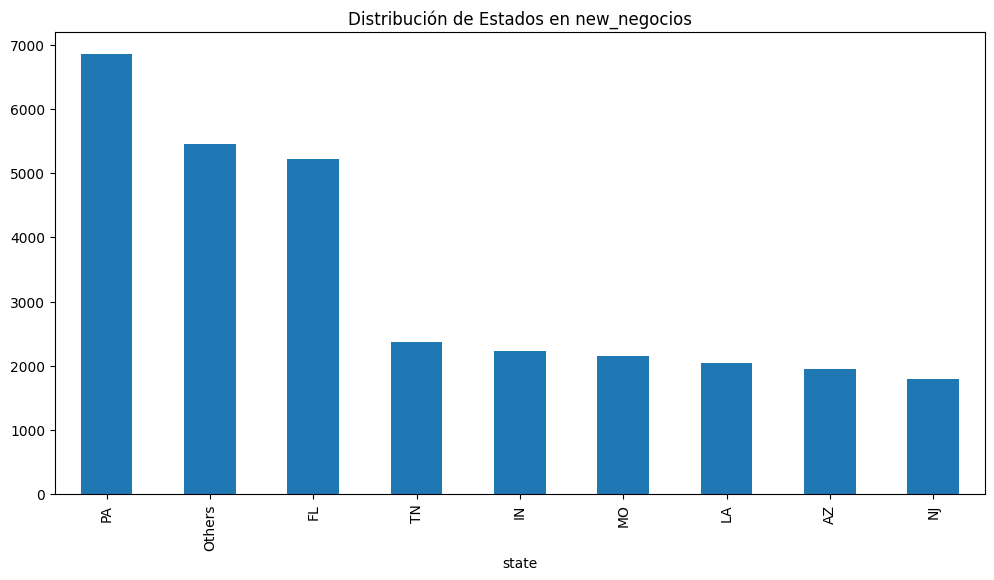

In [27]:
umbral = state_counts.mean()

# Paso 3: crear una nueva columna donde los estados raros se etiquetan como 'Others'
new_negocios['state'] = new_negocios['state'].apply(lambda x: x if state_counts[x] >= umbral else 'Others')
new_negocios['state'].value_counts().plot(kind='bar', figsize=(12, 6), title='Distribución de Estados en new_negocios')

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Crear el codificador
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Aplicar sobre la columna 'state'
state_onehot = encoder.fit_transform(new_negocios[['state']])

# Obtener los nombres de columnas codificadas
state_columns = encoder.get_feature_names_out(['state'])

# Crear DataFrame con los vectores
state_vector_df = pd.DataFrame(state_onehot, columns=state_columns, index=new_negocios.index)

# (opcional) Unirlo al dataset original
new_negocios = pd.concat([new_negocios, state_vector_df], axis=1)

In [29]:
new_negocios = new_negocios.drop(columns=["state"])

In [30]:
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
17616,DkW5AYpWdz_vrPPr2AW_3Q,Nashville,3.0,20,True,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Beer, Wine & Spirits, Tours, Hotels & Travel, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47,flCIKgqlXd9eMrUedyf13A,Tampa,2.5,13,True,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Apartments, Home Services, Real Estate",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,jvsdP8Sm9z56xyrMXansbA,Boise,4.5,111,True,"{'RestaurantsTakeOut': 'True', 'BikeParking': ...","Food, Greek, Turkish, Modern European, Mediter...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18082,amZz4IPFbGLKrnL-bmM5Tg,Saint Louis,3.5,7,False,"{'RestaurantsPriceRange2': '3', 'BusinessParki...","Restaurants, American (New)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5401,tez6k-WegNFjLju6Qz9Vdw,Smyrna,3.5,92,True,"{'NoiseLevel': ""'quiet'"", 'RestaurantsTableSer...","Restaurants, Japanese, Sushi Bars",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
scaler = StandardScaler()

new_negocios['review_count'] = scaler.fit_transform(new_negocios[['review_count']])
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
29283,E6DY1DbTw4TyJL4kf4erGg,Haddonfield,3.5,-0.311869,True,{'ByAppointmentOnly': 'True'},"Doctors, Health & Medical",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13857,4HHMx7GSl8-C4XSuflVv0Q,Philadelphia,3.5,-0.113845,False,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Delis",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1441,TvLkdljMUHE2Yt-T_4OEWw,St Louis,4.5,-0.296027,True,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Shopping, Home Decor, Furniture Stores, Home &...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10893,yCJ5Ws_RarcO2pusKzmnkg,Philadelphia,2.0,-0.311869,True,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","General Dentistry, Dentists, Health & Medical",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23347,6LTEo6BDunWrkcHRcNul8g,Santa Barbara,4.0,1.082220,True,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Car Dealers, Auto Repair, Automotive, Auto Par...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
new_negocios['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                                                       217
Restaurants, Pizza                                                                                                                               181
Nail Salons, Beauty & Spas                                                                                                                       178
Chinese, Restaurants                                                                                                                             157
Restaurants, Mexican                                                                                                                             155
                                                                                                                                                ... 
American (Traditional), American (New), Hot Dogs, Burgers, Restaurants                         

In [33]:
def clasificar_categoria(categorias_str):
    categorias_str = str(categorias_str).lower()  # Por si hay NaNs o capitalización distinta

    if any(x in categorias_str for x in ['restaurant', 'food', 'pizza', 'mexican', 'chinese', 'japanese', 'sushi', 'ramen']):
        return 'Restaurante'
    elif any(x in categorias_str for x in ['fast food', 'burgers', 'hot dogs']):
        return 'Comida rápida'
    elif any(x in categorias_str for x in ['nail', 'beauty', 'spa', 'hair', 'salon']):
        return 'Belleza'
    elif any(x in categorias_str for x in ['shopping', 'fashion', 'clothing']):
        return 'Compras'
    elif any(x in categorias_str for x in ['hotel', 'travel', 'campgrounds']):
        return 'Hotelería'
    elif any(x in categorias_str for x in ['cleaning', 'services', 'laundry']):
        return 'Servicios'
    else:
        return 'Otros'
    
new_negocios['categories'] = new_negocios['categories'].apply(clasificar_categoria)
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
6172,oryMlrGdBRw7f1WtUMHUZA,Reno,4.0,0.068337,True,{'BusinessAcceptsCreditCards': 'True'},Otros,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24546,ooVtM90rPRO_ZqGLn0H4NA,Sicklerville,2.5,-0.264343,True,NaN,Compras,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1508,kSEKSneSXJ1UjUc06dymrA,Yardley,3.0,-0.240580,True,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Compras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20250,sbKjP-bD4N2I6GFb6i9qxA,Reno,4.0,-0.264343,True,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...",Servicios,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16694,HIn5bx4buTGF9DCuZdC7dg,Avon,3.5,-0.256422,False,"{'RestaurantsReservations': 'False', 'Restaura...",Restaurante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
new_negocios['attributes'].value_counts()

attributes
{'BusinessAcceptsCreditCards': 'True'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1884
{'ByAppointmentOnly': 'True'}                                                                                                                

Complicado de primeras

In [35]:
new_negocios = new_negocios.drop(columns=["attributes"])
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
29412,EAf8LnWLYbZ-QMtaz_UgrQ,Aston,4.0,-0.311869,True,Servicios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7256,QSJfqc9E3Z-p7LYLLhyDUA,Clearwater,5.0,-0.311869,True,Otros,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29274,xNRcraXS81xS62jz16bXCQ,Phoenixville,1.5,-0.185133,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14291,IKbtDT2u2Ta-_hfwJ_sURQ,New Orleans,5.0,-0.185133,True,Compras,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29299,QANjeI1iStmwufp9_18ryA,Wilmington,4.0,-0.169291,True,Belleza,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
value = new_negocios['city'].value_counts()
value

city
Philadelphia        2938
Tucson              1817
Tampa               1779
Indianapolis        1500
Nashville           1369
                    ... 
S.Pasadena             1
Lake Saint Louis       1
Marlborough            1
Meridan                1
East Nashville         1
Name: count, Length: 776, dtype: int64

Complicado de primeras

In [37]:
new_negocios = new_negocios.drop(columns=["city"])
new_negocios.sample(5)

,business_id,stars,review_count,is_open,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
20244,xGX07vvyhi0mKPY3b3y1uQ,3.5,-0.303948,True,Otros,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19757,gUrO_KwX_ZWguVu_Iv6yWQ,4.0,-0.264343,False,Compras,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23269,V9ypPL_SRu5mEEPyYs7gKQ,4.0,-0.296027,True,Belleza,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5959,YJn_vbvLVLySH3ZdMYlSsQ,1.5,-0.058398,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12116,aaBlYQpHUuSYEv1EtWgxuQ,4.0,0.036654,True,Restaurante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
new_negocios.isnull().sum()

business_id     0
stars           0
review_count    0
is_open         0
categories      0
state_AZ        0
state_FL        0
state_IN        0
state_LA        0
state_MO        0
state_NJ        0
state_Others    0
state_PA        0
state_TN        0
dtype: int64

In [39]:
train_reviews.shape, new_usuarios.shape, new_negocios.shape

((967784, 9), (699619, 4), (30069, 14))

## Mergear Neg

In [40]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414765 entries, 0 to 414764
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    414765 non-null  object
 1   user_id      414765 non-null  object
 2   business_id  414765 non-null  object
 3   useful       414765 non-null  int64 
 4   funny        414765 non-null  int64 
 5   cool         414765 non-null  int64 
 6   text         414765 non-null  object
 7   date         414765 non-null  object
dtypes: int64(3), object(5)
memory usage: 25.3+ MB


In [41]:
test_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [42]:
# Renombrar columnas de new_negocios, excepto 'business_id'
new_negocios_renamed = new_negocios.rename(
    columns={col: col + "_neg" for col in new_negocios.columns if col != "business_id"}
)

# # Renombrar columnas de new_usuarios, excepto 'user_id'
# new_usuarios_renamed = new_usuarios.rename(
#     columns={col: col + "_user" for col in new_usuarios.columns if col != "user_id"}
# )

# Unir las reseñas con la información de negocios
df_merged = train_reviews.merge(new_negocios_renamed, on="business_id", how="left")

# # Unir la información del usuario
# df_merged = df_merged.merge(new_usuarios_renamed, on="user_id", how="left")

# Verificar las primeras filas del dataframe resultante
df_merged.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
0,ZZO43qKB-s65zplC8RfJqw,-1BSu2dt_rOAqllw9ZDXtA,smkZq4G1AOm4V6p3id5sww,5.0,0,0,0,Fantastic fresh food. The greek salad is amazi...,2016-09-30 15:49:32,4.5,0.773303,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,vojXOF_VOgvuKD95gCO8_Q,xpe178ng_gj5X6HgqtOing,96_c_7twb7hYRZ9HHrq01g,1.0,2,0,1,Been a patient at Largo Med/Diagnostic Clinic ...,2020-12-09 14:39:51,2.5,-0.177212,True,Otros,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KwxdbiseRlIRNzpgvyjY0Q,axbaerf2Fk92OB4b9_peVA,e0AYjKfSF0DL-5C1CpOq6Q,4.0,0,0,0,The location is convenient to my campus so I d...,2013-09-04 16:19:51,2.5,-0.296027,True,Compras,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3mwoBcTy-2gMh0L91uaIeA,_GOiybb0rImYKJfwyxEaGg,vF-uptiQ34pVLHJKzPHUlA,5.0,0,0,0,I agree with all the other compliments posted ...,2019-03-02 12:24:14,4.5,0.226757,False,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,XfWf7XsBWs3kYyYq7Ns1ZQ,ojWKg3B5pH3ncAsxun3kUw,X28XK71RuEXPapeyUOwNzg,5.0,10,4,7,"Wanting to help out the local economy, I thoug...",2020-04-23 18:26:29,4.0,-0.105924,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_merged.info()
df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_id         967784 non-null  object 
 1   user_id           967784 non-null  object 
 2   business_id       967784 non-null  object 
 3   stars             967784 non-null  float64
 4   useful            967784 non-null  int64  
 5   funny             967784 non-null  int64  
 6   cool              967784 non-null  int64  
 7   text              967784 non-null  object 
 8   date              967784 non-null  object 
 9   stars_neg         967784 non-null  float64
 10  review_count_neg  967784 non-null  float64
 11  is_open_neg       967784 non-null  bool   
 12  categories_neg    967784 non-null  object 
 13  state_AZ_neg      967784 non-null  float64
 14  state_FL_neg      967784 non-null  float64
 15  state_IN_neg      967784 non-null  float64
 16  state_LA_neg      96

review_id           0
user_id             0
business_id         0
stars               0
useful              0
funny               0
cool                0
text                0
date                0
stars_neg           0
review_count_neg    0
is_open_neg         0
categories_neg      0
state_AZ_neg        0
state_FL_neg        0
state_IN_neg        0
state_LA_neg        0
state_MO_neg        0
state_NJ_neg        0
state_Others_neg    0
state_PA_neg        0
state_TN_neg        0
dtype: int64

In [44]:
df_merged.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'stars_neg', 'review_count_neg', 'is_open_neg',
       'categories_neg', 'state_AZ_neg', 'state_FL_neg', 'state_IN_neg',
       'state_LA_neg', 'state_MO_neg', 'state_NJ_neg', 'state_Others_neg',
       'state_PA_neg', 'state_TN_neg'],
      dtype='object')

In [45]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date'] = df_merged['date'].dt.year
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
857161,UENq20DJSRmskoK_OmAoqQ,FDkT_XGhE9rSqTLvsiNVMQ,Zqin1-4h9IRONQumzGwsSg,1.0,2,0,0,"Came to Clearwater for vacation, the sign said...",2014,3.5,0.274282,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566029,me-C2_FaREHqy_nXw_NJkQ,y6RyH7-xFNxT1VxSDfTQAQ,q_dCXxrhNDMEpc71CVL4Kw,1.0,4,0,0,As someone who is not from the Florida area I ...,2017,3.5,0.630726,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774737,UpxTp13MEeiC5OtB-u7lDA,hTqEkEr_HCqv3dqoEZDorw,CN5K-ZqMfOxYn0MVcbYejw,1.0,1,0,0,"Looked permanently closed on Saturday, Februar...",2015,4.0,-0.303948,False,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46178,wMMZD8u12cHUFHmuNbDoYw,z72G0C2kq0vP1vVX_EU2UQ,LM54ufrINJWoTN5imV8Etw,5.0,0,0,0,John's Roast Pork & Tommy DiNic's are the two ...,2011,4.5,12.036906,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
299312,OVQ6dCq59H9glcEERN2uHg,_UAU-UgY_7NxDITDqzn1HA,yys8OffwaaYsqwcRON-3-g,3.0,1,0,1,Service: 2\nComfort: 3.5\nCleanliness: 3.5\nDa...,2019,2.5,0.210915,True,Hotelería,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [46]:
cols = ['useful', 'funny', 'cool']

scaler = StandardScaler()

df_merged[cols] = scaler.fit_transform(df_merged[cols])
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
393582,wE2VEyEKEOCmqQhA0vRtSA,gEoULut6KQNgcBYfwXUYQg,vWouMwwOkvJs3SgnEK79CA,5.0,0.266410,-0.150312,-0.251644,Great service by Sixx ! Greatly appreciate it ...,2018,5.0,-0.050477,True,Servicios,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81962,7pRxpsmw0K4fbmOGH1xq0A,1E1vXIBjUJ62cTkWn0eFUw,ytynqOUb3hjKeJfRj5Tshw,5.0,-0.391093,-0.150312,-0.251644,It's an entire square block closed off to diff...,2018,4.5,44.964332,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
178875,uQg0VudnQcAehIOVXxbHfg,xhyYMaBonFzBt4Pt5tgLcw,Qa1YQzo00sm9O0JUlwdCQw,5.0,-0.391093,-0.150312,-0.251644,We had a wonderful tour and the food was excel...,2018,4.0,1.058457,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
452228,SOh5hyF9L-LCW0VtDZz_fg,wZBtj87cquMSMtm78TQDVw,n4GDJsQAyBrcWduMjcJ-4g,3.0,0.266410,-0.150312,-0.251644,My husband and I went to Kyoto for the first t...,2012,3.5,1.177272,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
160562,J2xkQ2kd0mlehytbV2G_nQ,CjhTdmN6qWEKC7Zo6qadow,67gnSHwFRKgtXlzHzuyGMQ,4.0,0.595161,-0.150312,-0.251644,We're not from Tucson and unfortunately we did...,2015,4.0,3.355535,True,Restaurante,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_merged.isnull().sum()

review_id           0
user_id             0
business_id         0
stars               0
useful              0
funny               0
cool                0
text                0
date                0
stars_neg           0
review_count_neg    0
is_open_neg         0
categories_neg      0
state_AZ_neg        0
state_FL_neg        0
state_IN_neg        0
state_LA_neg        0
state_MO_neg        0
state_NJ_neg        0
state_Others_neg    0
state_PA_neg        0
state_TN_neg        0
dtype: int64

In [48]:
df_merged.shape

(967784, 22)

In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_id         967784 non-null  object 
 1   user_id           967784 non-null  object 
 2   business_id       967784 non-null  object 
 3   stars             967784 non-null  float64
 4   useful            967784 non-null  float64
 5   funny             967784 non-null  float64
 6   cool              967784 non-null  float64
 7   text              967784 non-null  object 
 8   date              967784 non-null  int32  
 9   stars_neg         967784 non-null  float64
 10  review_count_neg  967784 non-null  float64
 11  is_open_neg       967784 non-null  bool   
 12  categories_neg    967784 non-null  object 
 13  state_AZ_neg      967784 non-null  float64
 14  state_FL_neg      967784 non-null  float64
 15  state_IN_neg      967784 non-null  float64
 16  state_LA_neg      96

In [50]:
df_merged_usr = df_merged.copy()
df_merged = df_merged.drop(columns=["review_id", "user_id", "business_id"])
df_merged.sample(5)

,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
345358,1.0,-0.391093,-0.150312,-0.251644,This is a lovely property inside out and with ...,2021,1.5,-0.303948,True,Servicios,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
514836,5.0,-0.062341,-0.150312,-0.251644,What a wonderful hidden gem. Not much to look ...,2020,4.5,0.472306,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
416800,5.0,0.595161,-0.150312,-0.251644,Okay so we stayed again in this hotel for a fe...,2011,4.0,-0.042556,True,Hotelería,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
915209,5.0,0.266410,-0.150312,-0.251644,Sadly I have had to be admitted to this hospit...,2016,2.0,0.646567,True,Otros,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574656,3.0,1.252664,-0.150312,4.313665,Update: it appears as though AA has changed th...,2016,4.5,-0.193054,True,Servicios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
new_negocios_renamed = new_negocios.rename(
    columns={col: col + "_neg" for col in new_negocios.columns if col != "business_id"}
)
df_test_merged = test_reviews.merge(new_negocios_renamed, on="business_id", how="left")

df_test_merged.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
0,ieYPmCImINjPzTDFmEKBKA,79F9QrQSet-b1yRCIM243Q,sXSUzImYOcRRI3xtG2M85g,1,0,1,Amazing coffee and chill atmosphere. The staff...,2018-01-29 04:33:28,4.5,1.375296,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,QIkJ8fZ4yx_QaHahWWszAA,chuM6TBkFHtTwJ6z96Hj1A,Ipt9ga67vVC_2ob3YmVwNA,4,0,2,I pass by this joint every time I make a run t...,2011-01-10 03:10:49,4.0,0.583200,True,Restaurante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,seR2KhblYMWg-k9zzN6aYA,hF68a0mpu97u0oaryFYhyg,_RG4IByyBR528CMc7DefJA,2,0,0,Came here when my kitten got very sick by the ...,2015-09-06 15:29:02,3.5,0.765382,True,Otros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,BToo00Fi5pfJFA5MI2HM5g,G4yX5Q1tFfwSucFOmiyjdA,xxlbRiWWQkk-6LST3Hd12g,2,0,0,So I'll preface by saying we did have an overa...,2015-09-14 00:49:17,4.0,1.256481,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,FHJAzi1imodBit3RWK7zQA,Srqi1xb7exdB9uRHxDeEkw,LgGqdFLD7-ca0Z9F_q4Fuw,0,0,0,This place is a joke. Worst bar service ever. ...,2015-07-24 01:03:40,2.5,3.561480,True,Hotelería,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_test_merged.info()
df_test_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414765 entries, 0 to 414764
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_id         414765 non-null  object 
 1   user_id           414765 non-null  object 
 2   business_id       414765 non-null  object 
 3   useful            414765 non-null  int64  
 4   funny             414765 non-null  int64  
 5   cool              414765 non-null  int64  
 6   text              414765 non-null  object 
 7   date              414765 non-null  object 
 8   stars_neg         414765 non-null  float64
 9   review_count_neg  414765 non-null  float64
 10  is_open_neg       414765 non-null  bool   
 11  categories_neg    414765 non-null  object 
 12  state_AZ_neg      414765 non-null  float64
 13  state_FL_neg      414765 non-null  float64
 14  state_IN_neg      414765 non-null  float64
 15  state_LA_neg      414765 non-null  float64
 16  state_MO_neg      41

review_id           0
user_id             0
business_id         0
useful              0
funny               0
cool                0
text                0
date                0
stars_neg           0
review_count_neg    0
is_open_neg         0
categories_neg      0
state_AZ_neg        0
state_FL_neg        0
state_IN_neg        0
state_LA_neg        0
state_MO_neg        0
state_NJ_neg        0
state_Others_neg    0
state_PA_neg        0
state_TN_neg        0
dtype: int64

In [71]:
df_test_merged['date'] = pd.to_datetime(df_test_merged['date'])
df_test_merged['date'] = df_test_merged['date'].dt.year
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
87503,NYv1T-jeXUOFHXb0vNIDjA,L0KFvM8JvCVf24vboQEctA,04zP1Y6kdBNBXUJ3mjuJ0Q,0,0,0,Charles is an excellent litigation attorney - ...,2017,4.5,-0.153449,True,Servicios,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329083,waCpp6VGjxNGCxQheH8ntA,JVhTxsNFTXbLbMXUCbf-VQ,LM54ufrINJWoTN5imV8Etw,1,0,0,A lot of my co-workers really like this place ...,2015,4.5,12.036906,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
261463,v1GTrzDdv2iBFPvThGjMJQ,T5qGePErBICeTU2fePUZ8A,BjeHLwKOlHyV6DJgmZxAjA,0,0,0,"Great service, it is first come first serve so...",2017,4.0,16.575616,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
304832,DwkQMFXH9Vgd-9gjFvIQOA,imJBuczscEJKS-vgR9SRFQ,mfy9mpgQtsWW45jFuwsPFQ,1,0,0,Their Clay Pot (first thing on the menu) was u...,2014,4.0,-0.026714,False,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18189,9rX77LzbjQaS59CQ1DXlvw,0v0-n3GMYwfkfQ-iUk_FVw,2DTkzhmMpv5fIPKheePClA,0,0,0,"Delicious, fresh and flavorful dishes! Very fr...",2017,4.5,10.999261,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
cols = ['useful', 'funny', 'cool']

scaler = StandardScaler()

df_test_merged[cols] = scaler.fit_transform(df_test_merged[cols])
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
368527,zzQoBkbwKz4ixWe5DMA-VQ,YO3y16bzWiXbZbaG-MRUWw,0OMGkc4IUS9jSDUm1gGJ9A,1.89823,-0.164229,-0.252063,In reference to Lauren Z: I was Prim's groo...,2019,4.0,-0.208896,True,Servicios,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253428,dHIu-eJmyrtGu_iY-UZEXQ,WkVl_rsLh10R4tI7qmZcJA,ww3YJXu5c18aGZXWmm00qg,-0.39002,-0.164229,-0.252063,Came with a post-wedding party of 18 (table re...,2015,4.5,21.478689,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
261950,k9ClDqebySwJKxYomC6RCg,tlIkuzwGaZefnUb9GGSI7A,MJDsMlul6Nd7nQd-xQE7Pg,-0.39002,-0.164229,-0.252063,Quiet place for two or even a short business m...,2013,2.5,-0.018793,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
244296,sz4bSlsu6JQVL7paxppiSQ,ggjMP3GKa7wWCF42tn_u3A,a6J0Jq1GJ6Shk-L10Bp6Cw,-0.39002,-0.164229,-0.252063,SO yummy! My large group ate here recently and...,2019,4.0,5.216961,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210245,3dK8FeG8os3mqOLhEjcd9g,eDNaTYR_IUHWDrlOwKAiOw,rwZ-1fH9vdh1KRAowovXOQ,-0.39002,-0.164229,-0.252063,i've been here a million times over the past 2...,2021,3.5,-0.311869,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df_test_usr = df_test_merged.copy()
df_test_merged = df_test_merged.drop(columns=["user_id", "business_id"])
df_test_merged.sample(5)

,review_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
165286,8zqoxGYJSrulhjkMHV_VZw,-0.390020,-0.164229,-0.252063,We have come here numerous times for happy hou...,2014,3.5,7.316015,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
299643,iF472rLG10QjgcuO79AaEg,-0.390020,-0.164229,-0.252063,Absolutely horrible service. We ordered the na...,2020,3.5,2.278285,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
352148,55STUFVgtaPR3m6nW7wqDw,-0.390020,-0.164229,-0.252063,Drinks are overpriced and food is average. Ma...,2016,3.5,1.929763,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
206647,AU2DKNJqoCEBBOi0Slyw6g,-0.390020,-0.164229,-0.252063,Visited Massage Envy today for a relaxing mass...,2020,3.5,-0.058398,True,Belleza,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277825,mBGqUzVYnBmoVfv_JhZsFA,-0.063127,-0.164229,0.253789,Finally had the chance to stop by the new stor...,2017,4.0,-0.311869,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
df_test_merged.shape, df_merged.shape

((414765, 19), (967784, 19))

In [57]:
df_merged.columns

Index(['stars', 'useful', 'funny', 'cool', 'text', 'date', 'stars_neg',
       'review_count_neg', 'is_open_neg', 'categories_neg', 'state_AZ_neg',
       'state_FL_neg', 'state_IN_neg', 'state_LA_neg', 'state_MO_neg',
       'state_NJ_neg', 'state_Others_neg', 'state_PA_neg', 'state_TN_neg'],
      dtype='object')

In [58]:
df_test_merged.columns

Index(['review_id', 'useful', 'funny', 'cool', 'text', 'date', 'stars_neg',
       'review_count_neg', 'is_open_neg', 'categories_neg', 'state_AZ_neg',
       'state_FL_neg', 'state_IN_neg', 'state_LA_neg', 'state_MO_neg',
       'state_NJ_neg', 'state_Others_neg', 'state_PA_neg', 'state_TN_neg'],
      dtype='object')

In [90]:
df_merged.isnull().sum()

stars               0
useful              0
funny               0
cool                0
text                0
date                0
stars_neg           0
review_count_neg    0
is_open_neg         0
categories_neg      0
state_AZ_neg        0
state_FL_neg        0
state_IN_neg        0
state_LA_neg        0
state_MO_neg        0
state_NJ_neg        0
state_Others_neg    0
state_PA_neg        0
state_TN_neg        0
dtype: int64

In [89]:
df_test_merged.isnull().sum()

review_id           0
useful              0
funny               0
cool                0
text                0
date                0
stars_neg           0
review_count_neg    0
is_open_neg         0
categories_neg      0
state_AZ_neg        0
state_FL_neg        0
state_IN_neg        0
state_LA_neg        0
state_MO_neg        0
state_NJ_neg        0
state_Others_neg    0
state_PA_neg        0
state_TN_neg        0
dtype: int64

In [ ]:
df_test_merged.to_csv("../data/test_reviews_merged_neg.csv", index=False)
df_merged.to_csv("../data/train_reviews_merged_neg.csv", index=False)

## Megear Usr también

In [60]:
df_merged_usr.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
579747,RzwbI5AsZXZXQMjCfFpUSg,Z-o0vJmH_R2fetFN08zjyQ,-UcTo6lcikO1IPmh4t2ObA,5.0,-0.062341,-0.150312,-0.251644,Excellent sushi and very pleasant staff !!! Wi...,2016,4.5,0.226757,True,Restaurante,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
580122,Dpi7aOKNyO7GVBM35O20ZQ,LTlOx5e9UaOushaQq9j3GQ,q2sbzd5Z7Bi8pkmCyr-Umw,1.0,-0.391093,-0.150312,-0.251644,"I made appointment over the phone, which he se...",2021,5.0,-0.042556,True,Servicios,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
728997,spSR6qU03uMjEZQmWnSM7w,A5eLUjs8fomaz8JABPzKjg,htkEJvkIMjiMvaOOGfLCVg,1.0,-0.391093,0.300774,-0.251644,Worst Service Ever!\nWent there to celebrate m...,2021,3.5,0.733698,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97801,52sRv1tqRnWgAUb-ZCwWoQ,P9Du3v_1QPtrDMwXU-UWbg,bj123SnJ0Rchh4MJNCkmGQ,1.0,1.252664,0.300774,0.762869,Stay away! Placed order for flowers to be del...,2013,1.5,-0.185133,True,Compras,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213545,Mxroc1dBMk2OuqRw1UgniQ,UOJKJjrTs2_4mUUrpc3vBw,0d1dpaZqcm7litFOJl7atA,5.0,-0.391093,-0.150312,-0.251644,Noble Crust has turned into one of my favorite...,2017,4.5,9.621014,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# # Renombrar columnas de new_usuarios, excepto 'user_id'
new_usuarios_renamed = new_usuarios.rename(
    columns={col: col + "_user" for col in new_usuarios.columns if col != "user_id"}
)

new_usuarios_renamed.sample(5)

,user_id,review_count_user,average_stars_user,compliment_user
405992,cxUdm2KFY04p3SUIT5lbPg,-0.247344,5.00,-0.035085
428950,phxazSDtObNikRBjVhGeeg,-0.296553,1.00,-0.035085
159369,rwjOvW_dG9iUNlDXQxJCRg,-0.263747,4.20,-0.033875
198788,7lP5mwHnPIK3WYiTlWUdjQ,-0.271949,2.75,-0.035085
105928,mqCuLxFioiGUWqG9iXr_Zg,-0.165329,5.00,-0.035085


In [78]:
# # Unir la información del usuario
df_merged_final = df_merged_usr.merge(new_usuarios_renamed, on="user_id", how="left")
df_merged_final.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg,review_count_user,average_stars_user,compliment_user
157387,zGDLMwRSlCYJ-AOpJNNEXw,GKM-nHXGvIztszy2O6_asw,siN5JEv_AQj037pwcN32pg,5.0,0.266410,-0.150312,-0.251644,"I stopped by this evening on a whim, I was a l...",2018,3.5,0.385176,True,Restaurante,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.296553,5.00,-0.033875
769587,WdItKjNEDhmm1MsKklysvA,OfKbJDBwybBeE306R1y4HA,yE1raqkLX7OZsjmX3qKIKg,4.0,-0.391093,-0.150312,-0.251644,Get the pork belly gnocchi! What a delicious d...,2016,4.0,6.484314,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.138126,4.22,-0.024191
786354,iWgM3MloEPbonHgsK_alMw,JqNzhoDuuwvTontdPjqE2Q,jp8K7RPJc3IwwkDYgfAZ5Q,5.0,-0.391093,-0.150312,-0.251644,First time I have been here in years and its j...,2020,3.5,0.599042,True,Restaurante,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.140725,4.95,-0.035085
703027,8mIMQKKJN-MRKhaxLTPz-g,XMriO6iHuuW5n91qf3aHkg,oJ4ik-4PZe6gexxW-tSmsw,1.0,0.266410,-0.150312,-0.251644,Went for a party. The bartender did not even ...,2016,3.5,2.642649,True,Restaurante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.198135,4.38,-0.033875
463519,_d9SQ3HJ7DzXD2guZLx_Cw,0m6KJhYz7sZEFUAVfYJDDQ,fneeyCOYV5-oVeQP0TACog,4.0,0.266410,-0.150312,0.255613,I've been intrigued by Destination Dogs since ...,2018,4.5,2.254522,False,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.170932,3.54,-0.021770


In [79]:
columns_to_drop = ["user_id", "review_id", "business_id"] + [col for col in df_merged.columns if col.startswith("state_")]
df_merged_final = df_merged_final.drop(columns=columns_to_drop)
df_merged_final.sample(5)

,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
317363,3.0,0.266410,-0.150312,-0.251644,I picked me up some Fuzzy's for lunch today. ...,2012,3.0,2.167392,True,Restaurante,11.144522,3.35,1.457467
42223,5.0,1.581415,-0.150312,-0.251644,Amazing!\n\nFood: my friends and I both got th...,2019,4.5,3.418903,True,Restaurante,1.023886,4.15,0.125912
43353,5.0,-0.062341,0.300774,0.255613,This is the best italian restaurant in south J...,2021,4.5,0.155468,True,Restaurante,0.154529,4.04,-0.027822
318373,5.0,-0.391093,-0.150312,0.255613,I finally found a decent steakhouse. They serv...,2021,4.0,1.771344,True,Restaurante,-0.165329,4.47,-0.030243
676920,5.0,-0.391093,-0.150312,-0.251644,Really enjoy eating at the Broke N Bored Grill...,2017,4.5,3.252563,True,Restaurante,-0.222740,4.67,-0.033875


Mismo proceso para test

In [80]:
df_test_usr.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
125175,EXhcoOMf6hX0YHcFGRGgow,N4gHKyjaAZ0C0avmPbquEA,Ycpvyln0SKOjHf2qyND6WQ,1.571337,0.811751,0.253789,Rip offs...my bill for a tiny house with 2 peo...,2017,1.5,0.100021,True,Servicios,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
345538,jD8mo4W1rQHQ0euaR6KQmA,RIU1WX5NagODVeoQu7TebA,6KsJ2zN2jdgEiQidiRczxQ,-0.390020,-0.164229,-0.252063,So good! The pitas are baked fresh and the bes...,2014,4.0,0.686172,True,Restaurante,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
327887,iyTLo69pTosuxyraT-Vphw,rn_l8wvR_osLtEz5irrngg,winkCYdiTroKdbPbV0DfRA,-0.390020,-0.164229,-0.252063,Been here on two different occasions. Service ...,2019,3.5,3.561480,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19461,Sb7cX7ZDs3ZdaqlEWvb0TQ,xxblDBC1-arq8m2snrkiFQ,_V6hl1oGkTV2KbGeax_HPA,-0.390020,-0.164229,-0.252063,Come for the taste and price not the service.\...,2018,4.0,6.983334,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319414,qpKT5h6iG1g9t6F0hBWMKQ,sLd780ZYA2mtRZEz6BCejg,dDFcdlDsBrXa_zZYBhUV9g,-0.063127,-0.164229,-0.252063,The best authentic Mexican food around. I live...,2016,4.5,0.012891,True,Restaurante,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [83]:
df_merged_final_test = df_test_usr.merge(new_usuarios_renamed, on="user_id", how="left")
df_merged_final_test.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg,review_count_user,average_stars_user,compliment_user
32825,N8k23CJqPkmiejUKHlA0uQ,nsQxwPQqPO39RXEKLMl5Kw,TG-YCLKCgbtL9H0UWPkuEg,0.263766,0.323761,0.253789,OMG!!!!!!!!!\nMy wife and I have a black stand...,2021,4.5,-0.113845,True,Servicios,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.239143,3.80,-0.029033
287675,gUJ424LORJFuKyykgiNBJw,n49jpnIpEejNgY8l9jXU2Q,IL4q5kYnSLSuhjlyxKuNMw,0.590659,-0.164229,-0.252063,Do not go here if you're in a hurry. I've been...,2015,3.0,-0.264343,False,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.017703,4.11,-0.033875
410475,_yids8-Mv5ifvnjPHReOAA,fed8pLs2WaQwOMlENM2oCg,OExFQ-LmXSMEOQkEEC1vww,-0.390020,-0.164229,-0.252063,"Amazing, Authentic, Atmosphere and Affordable ...",2021,4.0,-0.200975,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.189934,2.36,-0.035085
62343,DzZEortKn-MfRGUQGFhxUA,Hj-o_dC-5mZSm_phjnJ9tw,JzQsy7_G0p-UZGYFMCEHvQ,0.263766,-0.164229,-0.252063,The name doesn't lie! The food was absolutely ...,2017,3.5,2.365416,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121723,3.79,-0.027822
43446,weWXDNj3ar2RghIqNo05eg,kiKyT3FN1H3d3jSTU5I3zg,sjm9TFtN69KrVsgajcL2Pg,0.590659,0.811751,1.265494,I still remember coming here during my college...,2015,4.0,5.042700,True,Belleza,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.126956,3.57,0.124701


In [84]:
columns_to_drop = ["user_id", "business_id"] + [col for col in df_merged.columns if col.startswith("state_")]
df_merged_final_test = df_merged_final_test.drop(columns=columns_to_drop)
df_merged_final_test.sample(5)

,review_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,review_count_user,average_stars_user,compliment_user
22201,laS7r-_B9HBYV-U6a9MDww,-0.063127,-0.164229,-0.252063,After going to many different salons here in t...,2020,3.0,-0.169291,True,Belleza,0.039708,4.12,0.003651
237812,JhoeeVpsC5b7-5DA6EZPMg,0.590659,-0.164229,3.794755,The gochang ddukbokki was amazing!! 10/10 so d...,2021,3.5,-0.272264,True,Restaurante,0.474387,3.78,-0.026612
257714,_g41v8T9pHcV8dJA4b1B1g,-0.063127,-0.164229,-0.252063,Guess it took me quite a long time to get back...,2013,4.0,3.450587,True,Restaurante,0.597409,3.51,0.047229
375524,7KeENdtuTb7mW7TXRbPmQw,-0.390020,-0.164229,-0.252063,We loved it. Delicious breakfast. Fantastic se...,2019,4.5,1.153509,False,Restaurante,-0.083315,2.94,-0.031454
49749,NdLgVq1Xd6REI8PhFerXmQ,1.898230,1.787732,2.783051,This has to be one of the friendliest places I...,2009,4.5,1.224797,False,Restaurante,0.367767,4.30,0.107754


In [85]:
df_merged_final.shape, df_merged_final_test.shape

((967784, 13), (414765, 13))

In [87]:
df_merged_final.isnull().sum()

stars                 0
useful                0
funny                 0
cool                  0
text                  0
date                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [88]:
df_merged_final_test.isnull().sum()

review_id             0
useful                0
funny                 0
cool                  0
text                  0
date                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     1
average_stars_user    1
compliment_user       1
dtype: int64

In [92]:
columns_to_fill = ["review_count_user", "average_stars_user", "compliment_user"]

for column in columns_to_fill:
    df_merged_final[column] = df_merged_final[column].fillna(df_merged_final[column].mean())

df_merged_final.isnull().sum()

stars                 0
useful                0
funny                 0
cool                  0
text                  0
date                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     0
average_stars_user    0
compliment_user       0
dtype: int64

In [93]:
columns_to_fill = ["review_count_user", "average_stars_user", "compliment_user"]

for column in columns_to_fill:
    df_merged_final_test[column] = df_merged_final_test[column].fillna(df_merged_final_test[column].mean())

df_merged_final_test.isnull().sum()

review_id             0
useful                0
funny                 0
cool                  0
text                  0
date                  0
stars_neg             0
review_count_neg      0
is_open_neg           0
categories_neg        0
review_count_user     0
average_stars_user    0
compliment_user       0
dtype: int64

In [94]:
df_merged_final.to_csv("../data/train_reviews_merged_final.csv", index=False)
df_merged_final_test.to_csv("../data/test_reviews_merged_final.csv", index=False)